<a href="https://colab.research.google.com/github/khoaphamj1505/CS114.L11.KHCL/blob/master/Folio/Folio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dir ='/content/gdrive/MyDrive/PythonML/Data/Folio%20Leaf%20Dataset.rar (Unzipped Files)/Folio Leaf Dataset/Folio'
categories =['beaumier du perou','eggplant','fruitcitere','guava','hibiscus','betel','rose','chrysanthemum','ficus','duranta gold','ashanti blood','bitter orange','coeur demoiselle','jackfruit',
'mulberry leaf','pimento','pomme jacquot','star apple','barbados cherry','sweet olive','croton','thevetia','vieux garcon','chocolate tree','caricature plant','coffee','ketembilla','chinese guava','lychee','geranium','sweet potato','papaya']

In [ ]:
data=[]
for category in categories:
  path=os.path.join(dir,category)
  label=categories.index(category)

  for img in os.listdir(path):
    impath=os.path.join(path,img)
    folio=cv2.imread(impath,0)
    folio=cv2.resize(folio,(50,50))
    image=np.array(folio).flatten()
    data.append([np.array(image),np.array(label)])
  
print(len(data))


637


In [ ]:
print(data)

In [ ]:
import random
random.shuffle(data)


In [ ]:
features=[]
labels=[]

for feature, label in data:
  features.append(feature)
  labels.append(label)
  

In [ ]:
print(features)
print(labels)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
     features,labels, test_size=0.3)

In [ ]:
#train and test
knn = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='braycurtis')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8177083333333334


1


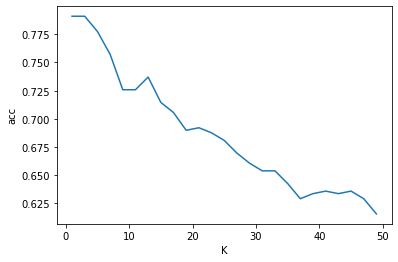

In [ ]:
#Tìm số k thích hợp model
k_val=[i for i in range(1,50,2)]
k_acc_scores=[]
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='braycurtis')
  cv_scores=cross_val_score(knn,X_train, y_train,cv=5,scoring='accuracy')
  k_acc_scores.append(cv_scores.mean())
k_max=k_val[k_acc_scores.index(max(k_acc_scores))]
print(format(k_max))
plt.plot(k_val,k_acc_scores)
plt.xlabel('K')
plt.ylabel('acc')
plt.show()
